In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools as it
import sys
import progressbar
from scipy.optimize import curve_fit

folder = "store/"

!ls "$folder"

dat_N_100_p_0.00_Nsample_200_cps_100.npy
dat_N_100_p_0.10_Nsample_200_cps_100.npy
dat_N_100_p_0.20_Nsample_200_cps_100.npy
dat_N_100_p_0.30_Nsample_200_cps_100.npy
dat_N_100_p_0.40_Nsample_200_cps_100.npy
dat_N_100_p_0.50_Nsample_200_cps_100.npy
dat_N_100_p_0.60_Nsample_200_cps_100.npy
dat_N_100_p_0.70_Nsample_200_cps_100.npy
dat_N_100_p_0.80_Nsample_200_cps_100.npy
dat_N_100_p_0.90_Nsample_200_cps_100.npy
dat_N_100_p_1.00_Nsample_200_cps_100.npy
dat_N_120_p_0.00_Nsample_200_cps_120.npy
dat_N_120_p_0.10_Nsample_200_cps_120.npy
dat_N_120_p_0.20_Nsample_200_cps_120.npy
dat_N_120_p_0.30_Nsample_200_cps_120.npy
dat_N_120_p_0.40_Nsample_200_cps_120.npy
dat_N_120_p_0.50_Nsample_200_cps_120.npy
dat_N_120_p_0.60_Nsample_200_cps_120.npy
dat_N_120_p_0.70_Nsample_200_cps_120.npy
dat_N_120_p_0.80_Nsample_200_cps_120.npy
dat_N_120_p_0.90_Nsample_200_cps_120.npy
dat_N_120_p_1.00_Nsample_200_cps_120.npy
dat_N_140_p_0.00_Nsample_200_cps_140.npy
dat_N_140_p_0.10_Nsample_200_cps_140.npy
dat_N_140_p_0.20

In [2]:
S = np.load(folder + "/dat_N_300_p_0.10_Nsample_200_cps_300.npy")
S.shape

(384, 200, 301)

In [3]:
v_N = np.arange(20,301,20)
v_p = np.linspace(0.,1.,11)

N_sample = 200
N_traj = 128

N_N, N_p = v_N.size, v_p.size

In [4]:
S_mean = []
S_var = []

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_p, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   

for i_N, N in enumerate(list(v_N)):   
    S_mean_N = []
    S_var_N = []
    for i_p, p in enumerate(list(v_p)):
        
        filename = "/dat_N_{}_p_{:.2f}_Nsample_{}_cps_{}.npy".format(N, p, N_sample, N)
        try:
            dat = np.load(folder + filename)
        except:
            print("file " + filename + " does not exist")
            dat = -np.ones((N_traj,N_sample,N+1)) # give negative value that can be filtered out later
        
        S_mean_N.append( np.mean(dat, axis=0) ) 
        S_var_N.append( np.std(dat, axis=0) / np.sqrt(dat.shape[0]) )

        count += 1
        bar.update(count)  

    S_mean.append( np.array(S_mean_N) )
    S_var.append( np.array(S_var_N) )

bar.finish()

[========================================================================] 100%


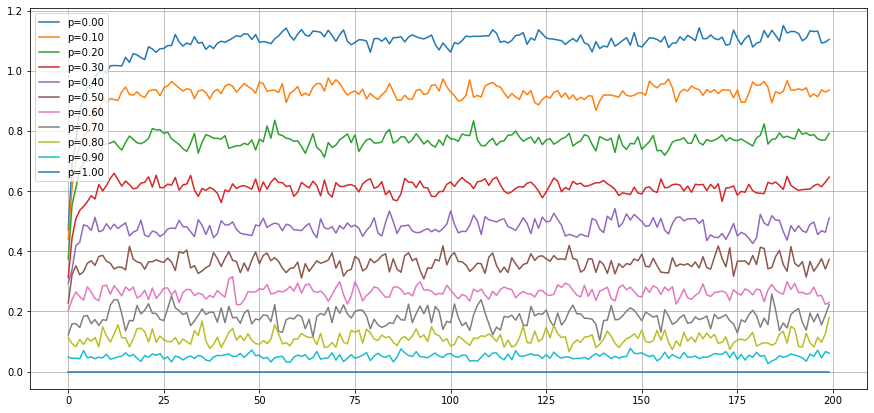

In [5]:
# plot some timelines
N = 300
l = N//2

i_N = np.argmin(np.abs(v_N-N))

plt.figure(figsize=(15,7))

for i_p, p in enumerate(list(v_p)):
    d_plot = S_mean[i_N][i_p,:,l]
    if np.mean(d_plot) >= 0.:
        plt.plot( d_plot, label="p={:.2f}".format(p))
    
plt.legend()
plt.grid(True)

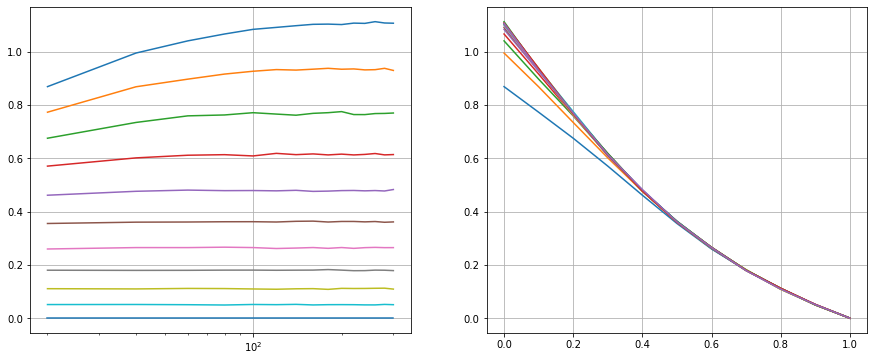

In [8]:
# plot half chain entropy for systems
t_sat = 50

S_max = np.zeros((N_N,N_p))
for i_N, N in enumerate(list(v_N)):
    for i_p, p in enumerate(list(v_p)):
        S_Np = np.mean(S_mean[i_N][i_p,t_sat:,N//2])
        S_max[i_N,i_p] = S_Np if S_Np >=0. else None

fig, ax = plt.subplots(1,2,figsize=(15,6))
_ = ax[0].semilogx(v_N,S_max)
_ = ax[1].plot(v_p,S_max.T)

for a in ax:
    a.grid(True)


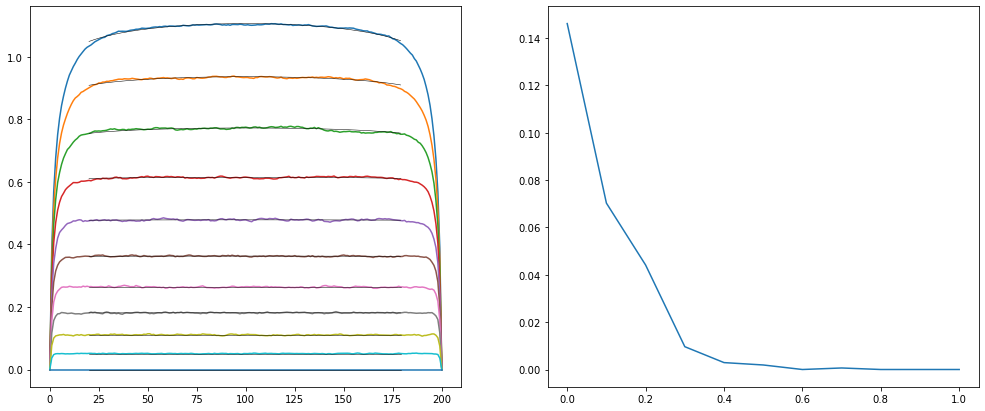

In [10]:
N = 200
t_sat = 50
offset = 20

i_N = np.argmin(np.abs(v_N-N))

# function for fit critical scaling
S_plot = 1.
def log_scale(x,c,s0):
    return c/6.*(1.+1./S_plot)*np.log(2*N/np.pi*np.sin(np.pi*x/N)) + s0

x_axis = np.linspace(0,N,N+1)
x_offset = x_axis[offset:-offset-1] # for fit, exclude boundaries

S_profile = np.zeros((N_p,N+1))
S_fit = np.zeros((N_p,len(x_offset)))
c = np.zeros(N_p)
s0 = np.zeros(N_p)
for i_p, p in enumerate(list(v_p)):
    Sl = np.mean(S_mean[i_N][i_p,t_sat:,:], axis=0)
    
    # do curve fit
    par,conv = curve_fit(log_scale, x_offset, Sl[offset:-offset-1], bounds=(0, [20,20]))
    
    S_profile[i_p,:] = Sl
    S_fit[i_p,:] = log_scale(x_offset, par[0], par[1])
    c[i_p] = par[0]
    s0[i_p] = par[1]

fig, ax = plt.subplots(1,2, figsize=(17,7))

_= ax[0].plot(x_axis,S_profile.T)
_= ax[0].plot(x_offset,S_fit.T,color="k", linewidth=0.5)

_= ax[1].plot(v_p,c)

In [ ]:
l = N//2
t_min = 0


_ = plt.plot(S_dat[:,t_min:,l].T, linewidth=.5)
_ = plt.plot(np.mean(S_dat[:,t_min:,l], axis=0), color="k", linewidth=2)